In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import scipy.optimize
import scipy.signal as ssg
import math

%matplotlib inline

In [2]:
address = "D:\Documents\Year 4\SESA6083 - Data-Driven Methods for Flow Analysis\Coursework 2"

# load 5 eigenvalues corresponding to eigenvectors
eigen = np.loadtxt(address+"/eigen.txt")
# 
eigenmat = scipy.io.loadmat(address+"/eigen.mat")
# cavity domain, U and V velocities
cavitydata = scipy.io.loadmat(address+"/cavitydata.mat")
# mean flow
mean_cavity = scipy.io.loadmat(address+"/mean_cavity.mat")
# CALL DATA POINT USING mat["x"]

In [4]:
print(eigen[:,0][0],eigen[:,1][0])
eigen_c = np.zeros(len(eigen),dtype=np.complex_)
for i in range(0,len(eigen)):
    eigen_c[i] = complex(eigen[:,0][i],eigen[:,1][i])
eigen_c

-0.1132458335707562 2.729806937307312


array([-0.11324583 +2.72980694j,  0.46844431 +7.88129876j,
        0.88937268+10.89875847j,  0.72081943+13.80094169j,
        0.01511048+16.72693492j])

In [5]:
print(cavitydata["Xgrid1"].shape)
print(cavitydata["Xgrid2"].shape)
print(eigenmat["EV0_Ug1"].shape)
print(cavitydata["Ug2"].shape)
print(eigenmat["EV0_Ug2"].shape)

(51, 371)
(101, 101)
(51, 371)
(101, 101, 1001)
(101, 101)


D:\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


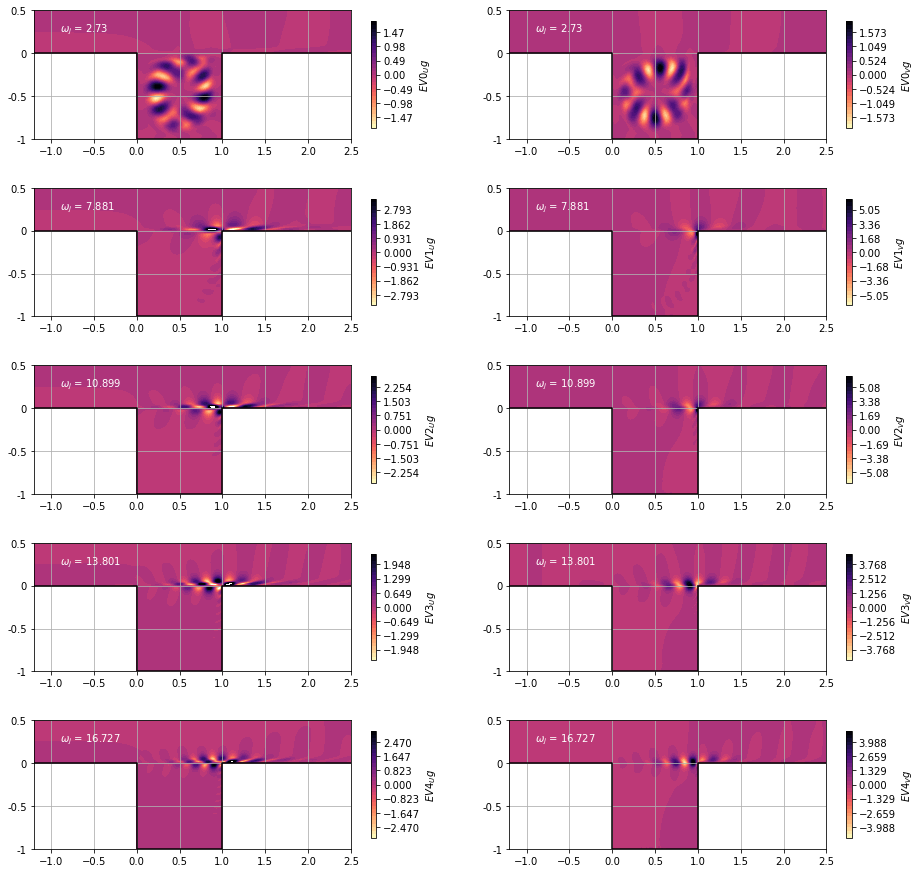

In [6]:
wally = [0,0,-1,-1,0,0]
wallx = [-1.2,0,0,1,1,2.5] 

plt.figure(1, figsize=(14, 13))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

for i in range(0,5):
    plt.subplot(5,2,i*2+1)
    plt.gca().set_aspect(1)
    levels = np.linspace(-np.real(eigenmat["EV"+str(i)+"_Ug2"]).max(),
                         np.real(eigenmat["EV"+str(i)+"_Ug2"]).max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], eigenmat["EV"+str(i)+"_Ug1"],
                 levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], eigenmat["EV"+str(i)+"_Ug2"],
                 levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$EV"+str(i)+"_Ug$")
    plt.annotate("$\omega_j$ = "+str(round(np.imag(eigen_c[i]),3)),(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1,'major')

    plt.subplot(5,2,i*2+2)
    plt.gca().set_aspect(1)
    levels = np.linspace(-np.real(eigenmat["EV"+str(i)+"_Vg2"]).max(),
                         np.real(eigenmat["EV"+str(i)+"_Vg2"]).max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], eigenmat["EV"+str(i)+"_Vg1"],
                 levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], eigenmat["EV"+str(i)+"_Vg2"],
                 levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$EV"+str(i)+"_Vg$")
    plt.annotate("$\omega_j$ = "+str(round(np.imag(eigen_c[i]),3)),(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1,'major')

#Plot for all modes
#all colorbar to force both sections to have the same colour scale

In [7]:
# Question 2: compute DMD

m1 = cavitydata["Ug1"].shape[2]
m2 = cavitydata["Ug2"].shape[2]
nx1 = cavitydata["Ug1"].shape[0]
ny1 = cavitydata["Ug1"].shape[1]
nx2 = cavitydata["Ug2"].shape[0]
ny2 = cavitydata["Ug2"].shape[1]

combined_x = np.vstack(
    (np.hstack([np.reshape(cavitydata["Xgrid1"], (nx1*ny1,1))]),
    np.hstack([np.reshape(cavitydata["Xgrid2"], (nx2*ny2,1))])))
combined_y = np.vstack(
    (np.hstack([np.reshape(cavitydata["Ygrid1"], (nx1*ny1,1))]),
    np.hstack([np.reshape(cavitydata["Ygrid2"], (nx2*ny2,1))])))
n_coords = len(combined_x)

combined_u = np.vstack(
    (np.hstack([np.reshape(cavitydata["Ug1"][:,:,i], (nx1*ny1,1)) for i in range(m1)]),
    np.hstack([np.reshape(cavitydata["Ug2"][:,:,i], (nx2*ny2,1)) for i in range(m2)])))
combined_v = np.vstack(
    (np.hstack([np.reshape(cavitydata["Vg1"][:,:,i], (nx1*ny1,1)) for i in range(m1)]),
    np.hstack([np.reshape(cavitydata["Vg2"][:,:,i], (nx2*ny2,1)) for i in range(m2)])))

print(len(combined_u))

X = np.vstack((combined_u,combined_v))

29122


In [8]:
import scipy.sparse as ssp

In [9]:
# construct two data matrices from X
X_1 = X[:,:-1]
X_2 = X[:,1:]
X.shape
X_1.shape

(58244, 1000)

In [10]:
# take SVD of X_1 (this overwrites some previously defined variables)
U, S, VH = np.linalg.svd(X_1, full_matrices=False)

(0.0, 100.0)

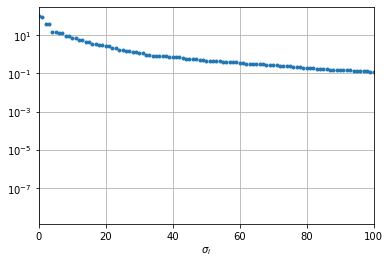

In [11]:
plt.semilogy(S, ".")
plt.grid(1)
plt.xlabel("i")
plt.xlabel("$\sigma_i$")
plt.xlim(0,100)

In [12]:
# rank of the SVD truncation
K = 100

# truncate the SVD
U_tilde = U[:, :K]
V_tilde = VH.T[:, :K]

# compute Sr inverse
S_tilde_inv = np.diag(1/S[:K])

In [13]:
# compute Bhat, the matrix of the best linear approximation in the reduced space
Bhat = U_tilde.T @ X_2 @ V_tilde @ S_tilde_inv

In [14]:
# perform eigendecomposition of Bhat and store eigenvalues and eigenvectors
GAMMA, W_ = np.linalg.eig(Bhat)
# GAMMA
# for i in range(0,len(GAMMA)):
#     print((np.real(GAMMA[i])**2+np.imag(GAMMA[i])**2)**0.5)

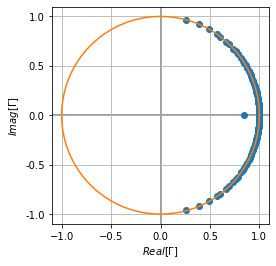

In [78]:
plt.plot(np.real(GAMMA), np.imag(GAMMA), "o")

plt.xlabel("$Real[\Gamma]$")
# plt.ylabel("$\omega_j$")
plt.ylabel("$Imag[\Gamma]$")
plt.axvline(0, color="0.5", zorder=0)
plt.axhline(0, color="0.5", zorder=0)

theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
plt.plot(x1, x2)
plt.yticks([1,0.5,0,-0.5,-1],[1.0,0.5,0.0,-0.5,-1.0])
plt.gca().set_aspect(1)
plt.grid(1)
#plt.xlim(-1.1, 1.1)

In [16]:
# QUESTION 3 - FIND CLOSEST FREQUENCY

# compute DMD modes
PHI_DMD = U_tilde @ W_

In [17]:
# Obtain angular frequency of the modes
# 0.01 from p2 Instructions, non-dimensional time units
lambdas = np.log(GAMMA)/0.01
#lambdas / 2 / np.pi

In [18]:
# Given in rad/s. rad/s = rot/s *2*pi

lambdas_provided = eigen_c
print(lambdas_provided)

[-0.11324583 +2.72980694j  0.46844431 +7.88129876j
  0.88937268+10.89875847j  0.72081943+13.80094169j
  0.01511048+16.72693492j]


(-1.0, 1.0)

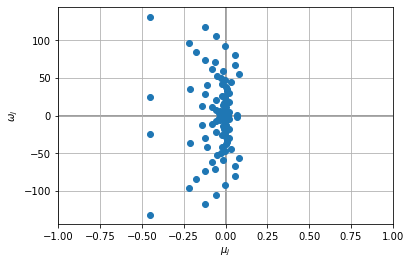

In [79]:
plt.plot(np.real(lambdas), np.imag(lambdas), "o")
# angular frequency = 2*pi*frequency, in rad/s
# divide by 2*pi to get the cycles per second

#plt.plot(eigen[:,0], eigen[:,1], "o", color="r")

# add a little label next to each eigenvalue with its index in the array lambdas
# for i in range(len(lambdas)):
#     if np.real(lambdas[i]) > -1:
#         plt.text(np.real(lambdas[i]) + 0.05, np.imag(lambdas[i]), i, fontsize=7, va='center')

plt.xlabel("$\mu_j$")
# plt.ylabel("$\omega_j$")
plt.ylabel("$\omega_j$")
plt.axvline(0, color="0.5", zorder=0)
plt.axhline(0, color="0.5", zorder=0)

plt.grid(1)
plt.xlim(-1, 1)

In [20]:
print(W_.shape)
print(PHI_DMD[:,0].shape)

(100, 100)
(58244,)


In [22]:
idx = np.zeros(5)
for i in range(0, len(eigen_c)):
    idx[i] = int((np.abs(np.imag(lambdas) - np.imag(eigen_c)[i])).argmin())
print(idx)

[91. 81. 75. 69. 65.]


(-1.0, 1.0)

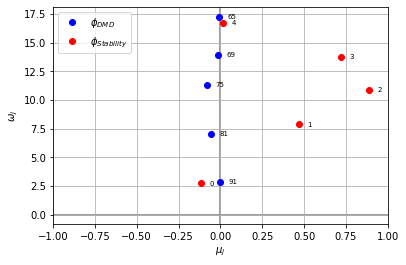

In [23]:
for i in range(0, len(eigen_c)):
    plt.plot(np.real(lambdas[int(idx[i])]), np.imag(lambdas[int(idx[i])]), "o", color="b", label="$\lambda_{DMD}$")
    plt.plot(np.real(eigen_c[i]), np.imag(eigen_c[i]), "o", color="r", label="$\lambda_{Stability}$")
    plt.text(np.real(lambdas[int(idx[i])]) + 0.05, np.imag(lambdas[int(idx[i])]), int(idx[i]), fontsize=7, va='center')
    plt.text(np.real(eigen_c[i]) + 0.05, np.imag(eigen_c[i]), i, fontsize=7, va='center')
    
plt.xlabel("$\mu_j$")
plt.ylabel("$\omega_j$")
plt.axvline(0, color="0.5", zorder=0)
plt.axhline(0, color="0.5", zorder=0)
plt.legend(['$\phi_{DMD}$', '$\phi_{Stability}$'],loc='upper left')
plt.grid(1)
plt.xlim(-1, 1)
# All modes slightly negative x axis - negative growth rate hence decay?

D:\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


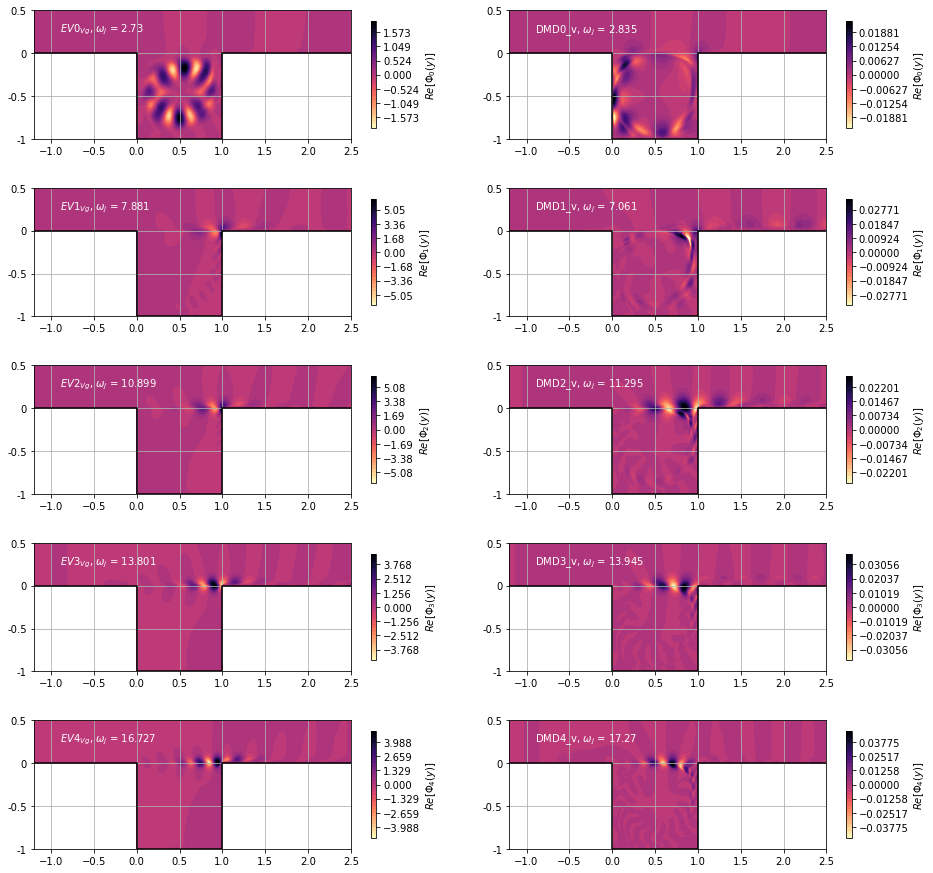

In [24]:
# Question 3: Plot transverse velocity component of DMD modes for frequencies at or near
# frequencies used for the stability modes in Q1. How do the structures in DMD compare to their
# stability counterparts?

plt.figure(1, figsize=(14, 13))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

# index of the mode we want to plot
for i in range(0,5):
    # extract v components from DMD mode
    v_DMD1 = np.reshape(PHI_DMD[(nx1*ny1+nx2*ny2):(2*nx1*ny1 + nx2*ny2), int(idx[i])], (nx1, ny1))
    v_DMD2 = np.reshape(PHI_DMD[(2*nx1*ny1 + nx2*ny2):, int(idx[i])], (nx2, ny2))
    
    plt.subplot(5,2,i*2+2)
    plt.gca().set_aspect(1)
    levels = np.linspace(-np.real(v_DMD2).max(), np.real(v_DMD2).max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], np.real(v_DMD1),levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], np.real(v_DMD2),levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$Re[\Phi_{"+str(i)+"}(y)]$")
    plt.annotate("DMD"+str(i)+"_v, $\omega_j$ = "+str(round(np.imag(lambdas)[int(idx[i])],3)),(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1)

    plt.subplot(5,2,i*2+1)
    plt.gca().set_aspect(1)
    levels = np.linspace(-np.real(eigenmat["EV"+str(i)+"_Vg2"]).max(), np.real(eigenmat["EV"+str(i)+"_Vg2"]).max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], eigenmat["EV"+str(i)+"_Vg1"],levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], eigenmat["EV"+str(i)+"_Vg2"],levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$Re[\Phi_{"+str(i)+"}(y)]$")
    plt.annotate("$EV"+str(i)+"_{ Vg}$, $\omega_j$ = "+str(round(np.imag(eigen_c)[i],3)),(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1)


#Plot for all modes
#all colorbar to force both sections to have the same colour scale

In [25]:
print((np.imag(lambdas).max()))

131.18677948547716


[91, 75]


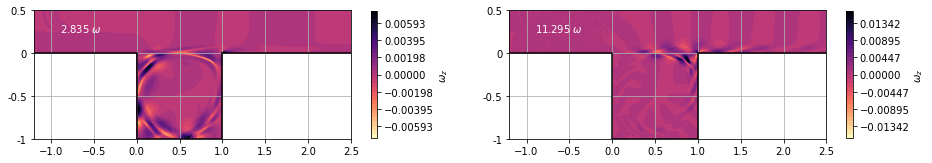

In [26]:
# QUESTION 4
omega_q4 = [2.5,11.5]

idx4 = [0] * 2
for i in range(0, len(omega_q4)):
    idx4[i] = (np.abs(np.imag(lambdas) - omega_q4[i])).argmin()
print(idx4)

plt.figure(1, figsize=(14, 2.6))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

# index of the mode we want to plot
for i in range(0,2):
    # extract v components from DMD mode
    u_DMD1 = np.reshape(PHI_DMD[:nx1*ny1, idx4[i]], (nx1, ny1))
    u_DMD2 = np.reshape(PHI_DMD[nx1*ny1:(nx1*ny1+nx2*ny2), idx4[i]], (nx2, ny2))
    v_DMD1 = np.reshape(PHI_DMD[(nx1*ny1+nx2*ny2):(2*nx1*ny1 + nx2*ny2), idx4[i]], (nx1, ny1))
    v_DMD2 = np.reshape(PHI_DMD[(2*nx1*ny1 + nx2*ny2):, idx4[i]], (nx2, ny2))
    # Index reference: x-grad, y-grad = np.grad(A)
    omega_z1 = np.gradient(np.real(v_DMD1))[0] - np.gradient(np.real(u_DMD1))[1]
    omega_z2 = np.gradient(np.real(v_DMD2))[0] - np.gradient(np.real(u_DMD2))[1]    
    
    plt.subplot(1,2,i+1)
    plt.gca().set_aspect(1)
    levels = np.linspace(-omega_z2.max(), omega_z2.max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], omega_z1,levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], omega_z2,levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$\omega_{z}$")
    plt.annotate(str(round(np.imag(lambdas[idx4[i]]),3))+" $\omega$",(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1)

# Plot 1 is cavity vortex
# Plot 2 is linear instability growing from the corner of the cavity

8.907852169506615
11.294711001170725
12.656467349894335
[79. 75. 73.]


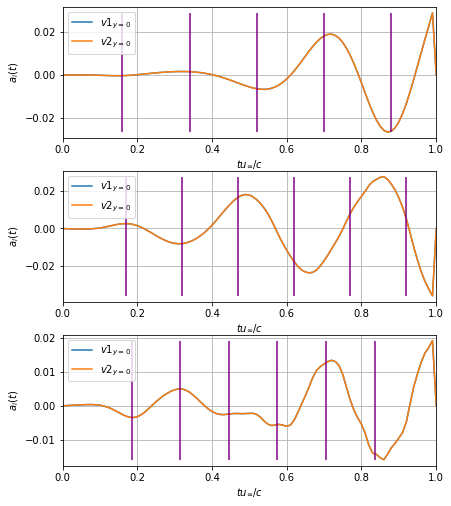

In [65]:
# QUESTION 5:

omega_q5 = [9,11.5,13]
idx5 = np.zeros(3)
for i in range(0, 3):
    idx5[i] = (np.abs(np.imag(lambdas) - omega_q5[i])).argmin()
    print(np.imag(lambdas[int(idx5[i])]))
print(idx5)

plt.figure(1, figsize=(6, 7))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

# index of the mode we want to plot
for i in range(0,3):
    # extract u and v components from DMD mode
    u_DMD1 = np.reshape(PHI_DMD[:nx1*ny1, int(idx5[i])], (nx1, ny1))
    u_DMD2 = np.reshape(PHI_DMD[nx1*ny1:(nx1*ny1+nx2*ny2), int(idx5[i])], (nx2, ny2))
    v_DMD1 = np.reshape(PHI_DMD[(nx1*ny1+nx2*ny2):(2*nx1*ny1 + nx2*ny2), int(idx5[i])], (nx1, ny1))
    v_DMD2 = np.reshape(PHI_DMD[(2*nx1*ny1 + nx2*ny2):, int(idx5[i])], (nx2, ny2))
    
    #crop = 120
    plt.subplot(3,1,i+1)
    plt.plot(cavitydata["Xgrid1"][0][120:-150], np.real(v_DMD1[0])[120:-150], label="$v1_{y = 0}$")
    plt.plot(cavitydata["Xgrid2"][0], np.real(v_DMD2[100]), label="$v2_{y = 0}$")
    
    wavelength = [0.36,0.3,0.26]
    offset = [0.16,0.17,0.185]
    for n in range(0,6):
        plt.vlines(x=offset[i]+n*wavelength[i]/2, ymin=min(np.real(v_DMD1[0])[120:]),
                   ymax=max(np.real(v_DMD1[0])[120:]),color='purple')
    plt.grid(1)
    plt.xlim(0, 1)
    plt.legend()
    plt.ylabel("$a_i(t)$")
    plt.xlabel("$t u_\infty / c$")

In [59]:
# Re is fixed with kinematic viscosity, so we take U_inf as absolute value
Mean_velocity = mean_cavity["Umean1"][0][0]
print(Mean_velocity)
print(wavelength)
#print(np.imag(lambdas[idx5]))

# FIX IDX5 TO INTEGER

U_convection = [0] * 3
for i in range(0,3):
    # Frequency must be in rotataions/s for the formula - not radians
    U_convection[i] = np.abs(np.imag(lambdas[int(idx5[i])]))/2/np.pi*wavelength[i]
print(U_convection)

u_mean_y0 = np.average(mean_cavity["Umean1"][0][120:-150])
print(u_mean_y0)

1.0
[0.36, 0.3, 0.26]
[0.5103823338391831, 0.5392827259892193, 0.5237282286123847]
0.4139823628048695


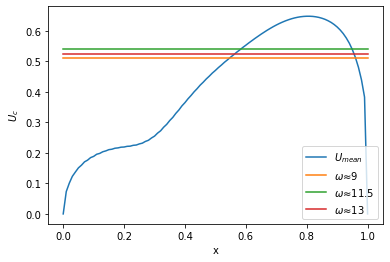

In [57]:
plt.plot(cavitydata["Xgrid1"][0][120:-150], mean_cavity["Umean1"][0][120:-150])
plt.plot(cavitydata["Xgrid1"][0][120:-150], [U_convection[0]]*101)
plt.plot(cavitydata["Xgrid1"][0][120:-150], [U_convection[1]]*101)
plt.plot(cavitydata["Xgrid1"][0][120:-150], [U_convection[2]]*101)
#plt.plot(cavitydata["Xgrid1"][0][120:-150], [u_mean_y0]*101)
plt.xlabel("x")
plt.ylabel("$U_c$")
convs = ['$U_{mean}$','$\omega \u2248 9$','$\omega \u2248 11.5$','$\omega \u2248 13$']
plt.legend(convs,loc='lower right')

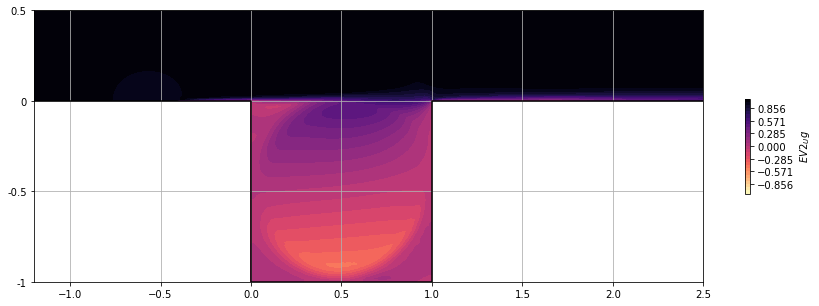

In [30]:
plt.figure(figsize=(15,5))
plt.gca().set_aspect(1)
levels = np.linspace(-1.07, 1.07, 31)
plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], mean_cavity["Umean1"],levels = levels, cmap="magma_r")
plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], mean_cavity["Umean2"],levels = levels, cmap="magma_r")
plt.plot(wallx, wally,'k',linestyle='-',marker='')
plt.colorbar(shrink=0.35, label="$EV"+str(i)+"_Ug$")
plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
plt.grid(1)

In [31]:
# Question 6

# transform mean flow into a vector
x_bar = np.reshape(np.mean(X,axis=1), (-1,1))
# compute fluctuation
Xp = X - x_bar
A_c = (cavitydata["Xgrid1"][0][1]-cavitydata["Xgrid1"][0][0])*(cavitydata["Ygrid1"][1][0]
                                                               -cavitydata["Ygrid1"][0][0])
# TASK: compute factor of the Cholesky decomposition
L = ssp.diags(np.repeat(A_c, 2*(51*371+101*101))**0.5)
# and its inverse
Linv = ssp.diags(1/np.repeat(A_c, 2*(51*371+101*101))**0.5)
# TASK: compute the svd of an appropriate matrix
U6, S6, VT6 = np.linalg.svd(L.T @ Xp, full_matrices=False)

PHI = Linv.T @ U6
PHI.shape #same shape as U
PHI_u = PHI[:int(51*371+101*101), :]
PHI_v = PHI[int(51*371+101*101):, :]

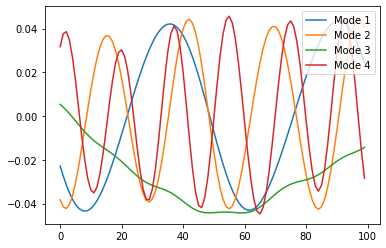

In [76]:
i_m = [0,2,4,6]# index of the mode we want to plot
n_m = ['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4']
for i in range(0,4):
    plt.plot(VT6[i_m[i]][:100])
    plt.legend(n_m,loc='upper right')

[11.926, 23.225, 3.138, 35.151]


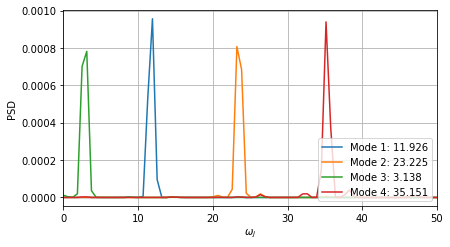

In [77]:
# Frequency spectrum
plt.figure(1, figsize=(6, 3))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

omegaPOD = [0] * 4
n_mf = n_m
# index of the mode we want to plot
for i in range(0,4):
    fPOD, PPOD = ssg.welch(VT6[i_m[i]], fs=1/0.01*2*np.pi, window='hann', nperseg=1001)
    omegaPOD[i] = round(fPOD[PPOD.argmax()],3)
    n_mf[i] = n_mf[i]+": "+str(omegaPOD[i])
    plt.plot(fPOD, PPOD)
    #note: non-dimensional frequency: multiply frequency by reference timescale. Strouhd number f tilde.
plt.grid(1)
plt.xlabel("$\omega_j$")
plt.ylabel("PSD")
plt.xlim(0, 50)
plt.legend(n_mf,loc='lower right')
print(omegaPOD)

(29122, 1001) (18921, 1001) (10201, 1001)


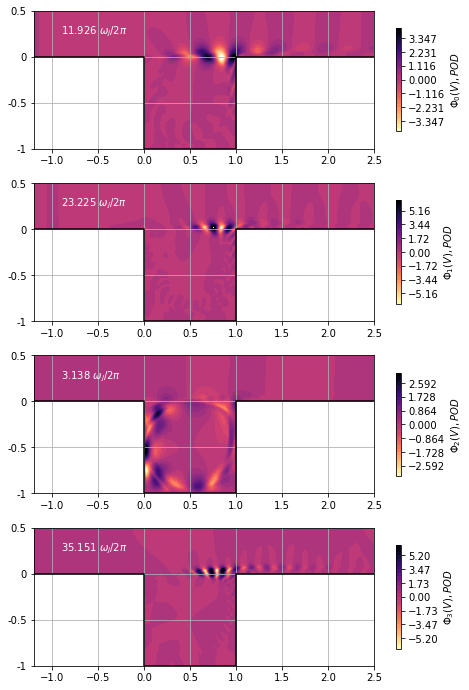

In [34]:
# Plot POD modes
PHI_u1 = PHI_u[:int(51*371), :]
PHI_u2 = PHI_u[int(51*371):, :]
PHI_v1 = PHI_v[:int(51*371), :]
PHI_v2 = PHI_v[int(51*371):, :]
print(PHI_u.shape, PHI_u1.shape, PHI_u2.shape)

plt.figure(1, figsize=(7,10))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

for i in range(0,4):
    phi_u1 = np.reshape(PHI_u1[:,i_m[i]],(51,371))
    phi_u2 = np.reshape(PHI_u2[:,i_m[i]],(101,101))
    phi_v1 = np.reshape(PHI_v1[:,i_m[i]],(51,371))
    phi_v2 = np.reshape(PHI_v2[:,i_m[i]],(101,101))
    
    plt.subplot(4,1,i+1)
    plt.gca().set_aspect(1)
    levels = np.linspace(-phi_v2.max(), phi_v2.max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], phi_v1,levels=levels, cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], phi_v2,levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$\Phi_{"+str(i)+"}(V), POD$")
    plt.annotate(str(round(omegaPOD[i],3))+" $\omega_j/2\pi$",(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1)

In [35]:
idx6 = [0] * 4
for i in range(0, 4):
    idx6[i] = (np.abs(np.imag(lambdas) - omegaPOD[i])).argmin()
print(idx6)
print(omegaPOD)
print(np.imag(lambdas[idx6]))

[71, 54, 91, 40]
[11.92612595768353, 23.224561075488978, 3.1384541993904023, 35.15068703317251]
[11.74701413 23.49293624  2.83495434 35.23732059]


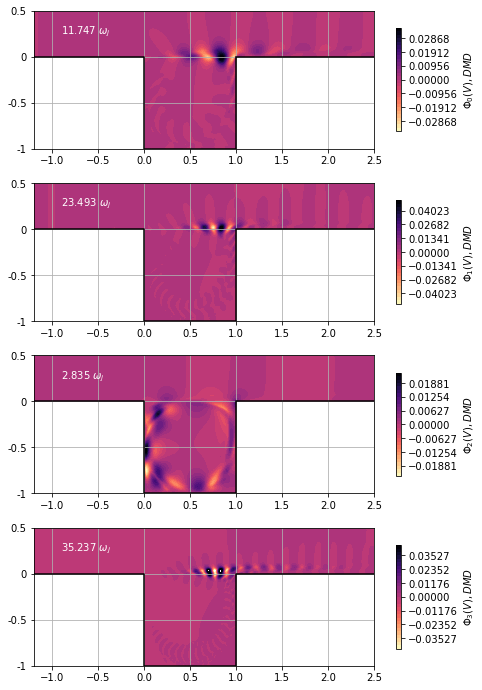

In [36]:
plt.figure(1, figsize=(7,10))
plt.subplots_adjust(top=0.96, hspace=0.25, bottom=0.05, right=0.99)
plt.clf()

for i in range(0,4):
    # extract v components from DMD mode
    v_DMD1 = np.reshape(PHI_DMD[(nx1*ny1+nx2*ny2):(2*nx1*ny1 + nx2*ny2), idx6[i]], (nx1, ny1))
    v_DMD2 = np.reshape(PHI_DMD[(2*nx1*ny1 + nx2*ny2):, idx6[i]], (nx2, ny2))
    
    plt.subplot(4,1,i+1)
    plt.gca().set_aspect(1)
    levels = np.linspace(-np.real(v_DMD2).max(), np.real(v_DMD2).max(), 31)
    plt.contourf(cavitydata["Xgrid1"],cavitydata["Ygrid1"], np.real(v_DMD1),levels=levels,cmap="magma_r")
    plt.contourf(cavitydata["Xgrid2"],cavitydata["Ygrid2"], np.real(v_DMD2),levels=levels, cmap="magma_r")
    plt.plot(wallx, wally,'k',linestyle='-',marker='')
    plt.colorbar(shrink=0.75, label="$\Phi_{"+str(i)+"}(V), DMD$")
    plt.annotate(str(round(np.imag(lambdas[idx6[i]]),3))+" $\omega_j$",(-0.9,0.25),color="w")
    plt.yticks([0.5,0,-0.5,-1],[0.5,0,-0.5,-1])
    plt.grid(1)

In [44]:
len_d = 4 #number of modes (dmd, pod in that order) from data
len_p = 4
projections = np.zeros((len_d,len_p))
for i in range(0,len_p):
    for j in range(0,len_d):
        #manipulating modes so both datasets are spatially aligned
        psi_p = PHI_v1[:,i_m[i]]
        psi_d = np.reshape(np.real(np.reshape(PHI_DMD[(nx1*ny1+nx2*ny2):(2*nx1*ny1 + nx2*ny2), idx6[j]], (nx1, ny1))),(51*371))
#         psi_p = PHI_v2[:,i_m[i]]
#         psi_d = np.reshape(np.real(np.reshape(PHI_DMD[(2*nx1*ny1 + nx2*ny2):, idx6[i]], (nx2, ny2))),(101*101))
        psi_p_t = np.transpose(psi_p)
        psi_d_t = np.transpose(psi_d)
        # normalising and projecting pod onto dmd modes
        projections[j,i] = abs(np.dot(psi_p_t,psi_d)/(math.sqrt(np.dot(psi_p_t,psi_p))*math.sqrt(np.dot(psi_d_t,psi_d))))
        
projections = np.rot90(np.fliplr(projections))

<Figure size 432x288 with 0 Axes>

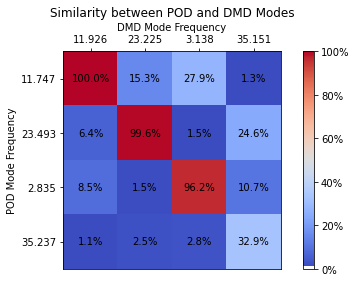

In [45]:
from matplotlib.cm import ScalarMappable
import pandas as pd

sort_projections = projections

plt.set_cmap("coolwarm")
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Similarity between POD and DMD Modes')
im = ax.imshow(sort_projections)
cbar = fig.colorbar(im, ticks=[0,0.2,0.4,0.6,0.8,1])
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar.set_ticklabels(["0%","20%","40%","60%","80%","100%"])
plt.xlabel('DMD Mode Frequency')
plt.ylabel('POD Mode Frequency')

omega_x = np.zeros(len_d)
omega_y = np.zeros(len_d)
for i in range(0,len_d):
    omega_x[i] = str(round(omegaPOD[i],3))
    omega_y[i] = str(round(np.imag(lambdas[idx6[i]]),3))
ax.set_xticks(np.arange(0,len_d),omegaPOD)
ax.set_xticklabels(omega_x)
ax.set_yticks(np.arange(0,len_p),np.imag(lambdas[idx6]))
ax.set_yticklabels(omega_y)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

for j in range(len_p):
    for i in range(len_d):
        # displaying projections as percentage for each combination necessitates formatting
        text = ax.text(i, j, format(round(sort_projections[j, i],3),'.1%'),ha="center",
                       va="center", color="black")

plt.show()
# Low-frequency mode, excitation in the cavity
# Shedding frequency at the wall and its first 2 harmonics